In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.metrics import RootMeanSquaredError


## 1. Análise dos dados

In [144]:
df_train = pd.read_csv('data/training.csv')
df_test = pd.read_csv('data/test.csv')

df_train


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [143]:
df_train_na = df_train.isna()



df_train_na.sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [145]:
# substituindo os valores nulos por 0
df_train.dropna(inplace=True)


In [148]:
df_train.shape

(2140, 31)

In [149]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float64
 1

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


Então temos 30 keypoints e 1 uma imagem cada linha

In [150]:
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


## 2. Pre-Processamento dos dados

In [151]:
# Como as imagens estão em formato de string, precisamos convertê-las para um array numpy
# Na descrição do dataset, é dito que as imagens são 96x96 pixels, então vamos usar isso para redimensionar as imagens

df_train['Image'] = df_train['Image'].apply(lambda x: np.fromstring(x, sep=' ').reshape(96, 96))
df_test['Image'] = df_test['Image'].apply(lambda x: np.fromstring(x, sep=' ').reshape(96, 96))


In [152]:
df_train['Image'].head()

0    [[238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 23...
1    [[219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 21...
2    [[144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 18...
3    [[193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 19...
4    [[147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 21...
Name: Image, dtype: object

(96, 96)


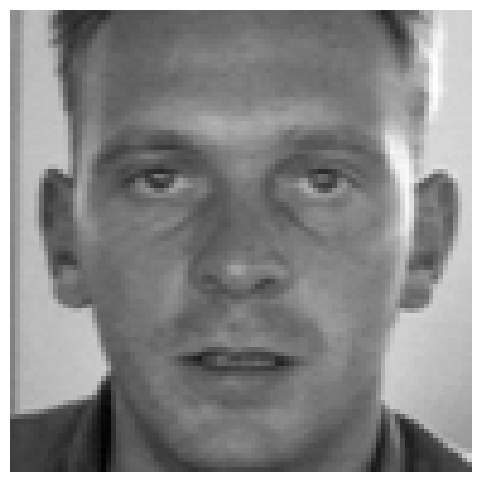

In [153]:
plt.figure(figsize=(10, 6))
# mostrar a imagem do dataframe vendo os valores como uma imagem
print(df_train['Image'][2].shape)
plt.imshow(df_train['Image'][2], cmap='grey')
plt.axis('off')
plt.show()


## 3. Separando os dados

In [154]:
X_train = np.array(df_train['Image'].tolist())
y_train = df_train.drop(columns=['Image']).values

X_test = np.array(df_test['Image'].tolist())
y_test = df_test.drop(columns=['Image']).values

## 4. Modelo

In [155]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [174]:
model = models.Sequential()
model.add(layers.Conv2D(16, (10, 10), activation='sigmoid', input_shape=(96, 96, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (2, 2), activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(30))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 87, 87, 16)     │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 43, 43, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 42, 42, 8)      │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 14112)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │       903,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,318 (3.46 MB)

 Trainable params: 907,318 (3.46 MB)

 Non-trainable params: 0 (0.00 B)

In [175]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError(), 'accuracy'])

history = model.fit(X_train, y_train, epochs=500, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.0000e+00 - loss: 2529.8550 - root_mean_squared_error: 50.2972 - val_accuracy: 0.0000e+00 - val_loss: 2544.2419 - val_root_mean_squared_error: 50.4405
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 2474.8159 - root_mean_squared_error: 49.7474 - val_accuracy: 0.0000e+00 - val_loss: 2502.2092 - val_root_mean_squared_error: 50.0221
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 2430.7607 - root_mean_squared_error: 49.3027 - val_accuracy: 0.0000e+00 - val_loss: 2460.8035 - val_root_mean_squared_error: 49.6065
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 2388.4358 - root_mean_squared_error: 48.8716 - val_accuracy: 0.0000e+00 - val_loss: 2420.0571 - val_root_mean_squared_error: 49.1941
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 2348.6467 - root_mean_squared_error: 48.4628 - val_a

In [158]:
print(pred[0][4])
x = pred[0].tolist()
x[4], y_train[0][4]

23.827116


(23.827116012573242, np.float64(59.582075188))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


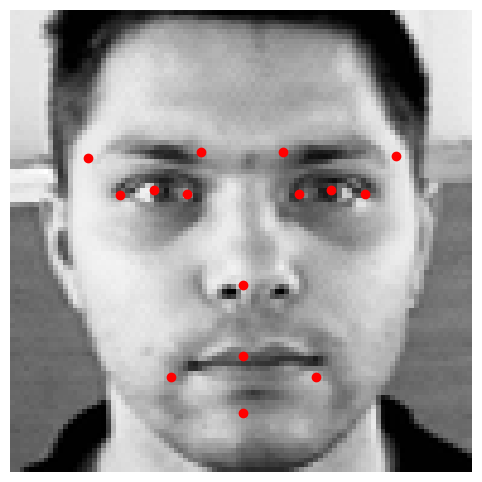

In [179]:
foto_testada = 3

pred = model.predict(X_train[foto_testada].reshape(1 , 96, 96, 1))

# plotar a imagem original e os keypoints previstos
plt.figure(figsize=(10, 6))
plt.imshow(X_train[foto_testada], cmap='gray')
plt.scatter(pred[0].tolist()[0:30:2], pred[0].tolist()[1:30:2], c='red')
#plt.scatter(y_train[foto_testada][0:30:2], y_train[foto_testada][1:30:2], c='blue')
plt.axis('off')
plt.show()

